In [1]:
import statsmodels.api as sm
import numpy as np

## 1. AR Models

### (a) Search for 4 parameters $\phi_1 \cdots \phi_4$ such that the corresponding AR(4) model is stationary. Choose your own $\sigma_{\epsilon}$ value for the variance of the gaussian white noise. Generate 4 years worth of data points (1008 observations). Calculate ACF and PACF for the data that you generated.

* AR(4) model parameters setting

In [2]:
arparams = np.array([-0.4,0.6,0.15,-0.1])
ar = np.r_[1,-arparams]
arma_process = sm.tsa.ArmaProcess(ar,[1])

* Stationarity and invertibility

In [3]:
arma_process.isstationary

True

In [4]:
arma_process.isinvertible

True

* Generate samples with chosen standard deviation noise equals to 0.1

In [5]:
y = arma_process.generate_sample(nsample=1008,scale=0.1)

* Fit data

In [6]:
model = sm.tsa.ARMA(y,(4,0)).fit(trend='nc')

In [7]:
model.params

array([-0.39926036,  0.57584369,  0.14407966, -0.08935232])

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1008
Model:                     ARMA(4, 0)   Log Likelihood                 874.526
Method:                       css-mle   S.D. of innovations              0.102
Date:                Thu, 15 Mar 2018   AIC                          -1739.052
Time:                        18:28:05   BIC                          -1714.474
Sample:                             0   HQIC                         -1729.714
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ar.L1.y       -0.3993      0.031    -12.723      0.000        -0.461    -0.338
ar.L2.y        0.5758      0.034     17.181      0.000         0.510     0.642
ar.L3.y        0.1441      0.034      4.296      0.000         0.078     0.210
ar.L4.y       -0.0894      0.031     -2.845      0.005        -0.151    -0.028
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4888           -0.1867j            1.5004           -0.4801
AR.2           -1.4888           +0.1867j            1.5004            0.4801
AR.3            1.7510           -0.0000j            1.7510           -0.0000
AR.4            2.8390           -0.0000j            2.8390           -0.0000
-----------------------------------------------------------------------------
"""

In [9]:
# autocorrelation
import matplotlib.pyplot as plt
def autocorrelation_check(timeseries,alpha):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(timeseries, alpha=alpha, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(timeseries, alpha=alpha, lags=40, ax=ax2)
    plt.show()

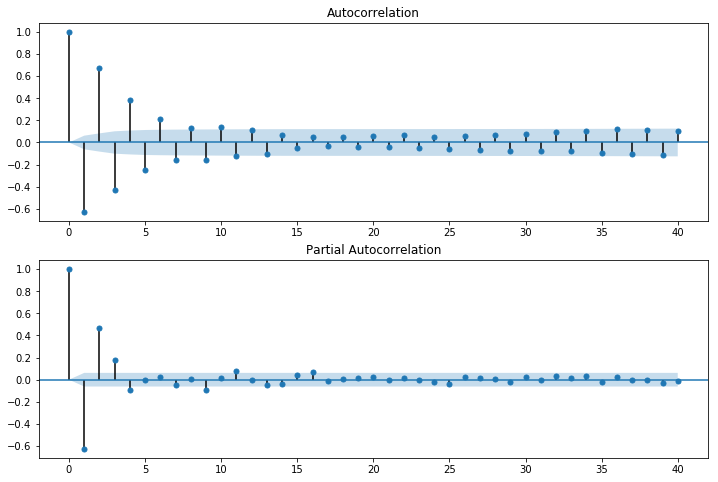

In [10]:
autocorrelation_check(y,0.05)

### (b) Write a paragraph detailing the differences between the two graphs. What is the recommended order of the corresponding model based on the data and the graphs you plotted?

>ACF: Autocorrelation Function ACF(h) is the correlation between data with different lags. And it's assumed to be invariant as process to be stationary.

>PACF: Partial Autocorrelation function PACF(h) is the conditional correlation between $x_t$ and $x_{t-h}$, conditional on $x_{t-h+1}, \cdots, x_{t-1}$. It can be viewed as an added attribution of $x_{t-h}$ to $x_{t}$ over an AR(h-1) model.

>Based on the **PACF** graph, using 5% significant level, we identify an AR(4) model for the data (i.e. p=4)

### (c) Using a method of your choice and the recommended order from the previous point estimate the parameters present in the model. Benchmark the estimates with respect to the known parameter values. Remember to pay attention to the form of the model used (standard or alternate form).

In [11]:
model = sm.tsa.ARMA(y,(4,0)).fit(trend='nc')

In [12]:
model.params

array([-0.39926036,  0.57584369,  0.14407966, -0.08935232])

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1008
Model:                     ARMA(4, 0)   Log Likelihood                 874.526
Method:                       css-mle   S.D. of innovations              0.102
Date:                Thu, 15 Mar 2018   AIC                          -1739.052
Time:                        18:28:07   BIC                          -1714.474
Sample:                             0   HQIC                         -1729.714
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ar.L1.y       -0.3993      0.031    -12.723      0.000        -0.461    -0.338
ar.L2.y        0.5758      0.034     17.181      0.000         0.510     0.642
ar.L3.y        0.1441      0.034      4.296      0.000         0.078     0.210
ar.L4.y       -0.0894      0.031     -2.845      0.005        -0.151    -0.028
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4888           -0.1867j            1.5004           -0.4801
AR.2           -1.4888           +0.1867j            1.5004            0.4801
AR.3            1.7510           -0.0000j            1.7510           -0.0000
AR.4            2.8390           -0.0000j            2.8390           -0.0000
-----------------------------------------------------------------------------
"""

>Conclusion:
The AR order is correct and the coefficients are all within its confidence interval.

### (c) Repeat the entire procedure above (previous parts) however now generate data for 4 months (84 observations). Compare these estimates with the original values and the estimates in part (c). Please comment.

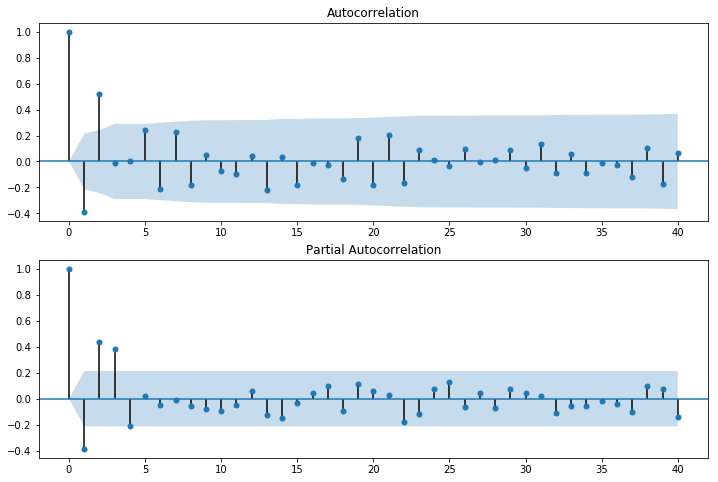

In [14]:
y_4_months = arma_process.generate_sample(nsample=84, scale=0.1)
autocorrelation_check(y_4_months,0.05)

>Based on the PACF graph, using 5% significant level, we identify an AR(2) model for the data (i.e. p=2)

In [15]:
model_4_months = sm.tsa.ARMA(y_4_months,(2,0)).fit(trend='nc')

In [16]:
model_4_months.params

array([-0.21668523,  0.43225407])

In [17]:
model_4_months.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:                     ARMA(2, 0)   Log Likelihood                  75.362
Method:                       css-mle   S.D. of innovations              0.098
Date:                Thu, 15 Mar 2018   AIC                           -144.725
Time:                        18:28:07   BIC                           -137.432
Sample:                             0   HQIC                          -141.793
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ar.L1.y       -0.2167      0.097     -2.234      0.028        -0.407    -0.027
ar.L2.y        0.4323      0.097      4.450      0.000         0.242     0.623
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2909           +0.0000j            1.2909            0.5000
AR.2            1.7922           +0.0000j            1.7922            0.0000
-----------------------------------------------------------------------------
"""

>Conclusion:
The AR order is different from the original data and the recommanded calibrated model. It is because we use only 84 observations which is too small and it increase the variance of the estimation of parameters.

## 2 MA Models

### a) Search for 4 parameters $\theta_1 \cdots \theta_4$ such that the corresponding MA(4) model is invertible. Choose your own $\sigma_{\epsilon}$ value for the variance of the gaussian white noise. Generate 4 years worth of data points (1008 observations). Calculate ACF and PACF for the data that you generated.

In [18]:
maparams = np.array([0.3,0.4,0.2,0.1])
ma = np.r_[1,maparams]
ma_process = sm.tsa.ArmaProcess(ar=[1],ma=ma)

In [19]:
ma_process.isstationary

True

In [20]:
ma_process.isinvertible

True

In [21]:
y_ma = ma_process.generate_sample(1008,scale=0.1)

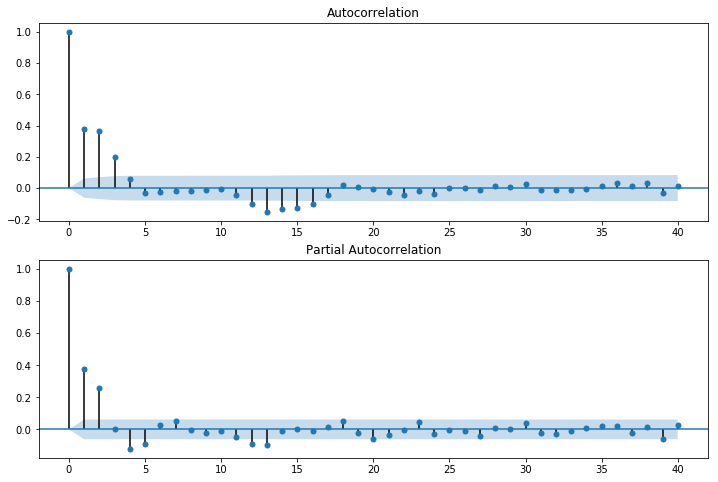

In [22]:
autocorrelation_check(y_ma,0.05)

### b) Write a paragraph detailing the differences between the two graphs. What is the recommended order of the corresponding model based on the data and the graphs you plotted?

>ACF: Autocorrelation Function ACF(h) is the correlation between data with different lags. And it's assumed to be invariant as process to be stationary.

>PACF: Partial Autocorrelation function PACF(h) is the conditional correlation between $x_t$ and $x_{t-h}$, conditional on $x_{t-h+1}, \cdots, x_{t-1}$. It can be viewed as an added attribution of $x_{t-h}$ to $x_{t}$ over an AR(h-1) model.

>Based on the **ACF** graph, using 5% significant level, we identify an MA(4) model for the data (i.e. q=4)

### (c) Using a method of your choice and the recommended order from the previous point estimate the parameters present in the model. Benchmark the estimates with respect to the known parameter values. Remember to pay attention to the form of the model used (standard or alternate form).

In [23]:
model_ma = sm.tsa.ARIMA(y_ma,(0,0,4)).fit(trend="nc")

In [24]:
model_ma.params

array([ 0.27120312,  0.37720839,  0.24831774,  0.09539629])

In [25]:
model_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1008
Model:                     ARMA(0, 4)   Log Likelihood                 930.006
Method:                       css-mle   S.D. of innovations              0.096
Date:                Thu, 15 Mar 2018   AIC                          -1850.012
Time:                        18:28:08   BIC                          -1825.433
Sample:                             0   HQIC                         -1840.674
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ma.L1.y        0.2712      0.031      8.645      0.000         0.210     0.333
ma.L2.y        0.3772      0.031     12.032      0.000         0.316     0.439
ma.L3.y        0.2483      0.031      8.123      0.000         0.188     0.308
ma.L4.y        0.0954      0.033      2.926      0.004         0.032     0.159
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.4490           -1.3761j            1.4475           -0.1998
MA.2            0.4490           +1.3761j            1.4475            0.1998
MA.3           -1.7505           -1.3923j            2.2367           -0.3931
MA.4           -1.7505           +1.3923j            2.2367            0.3931
-----------------------------------------------------------------------------
"""

>Conclusion: The estimation is approximately accurate. All lay in the confidence intervals.

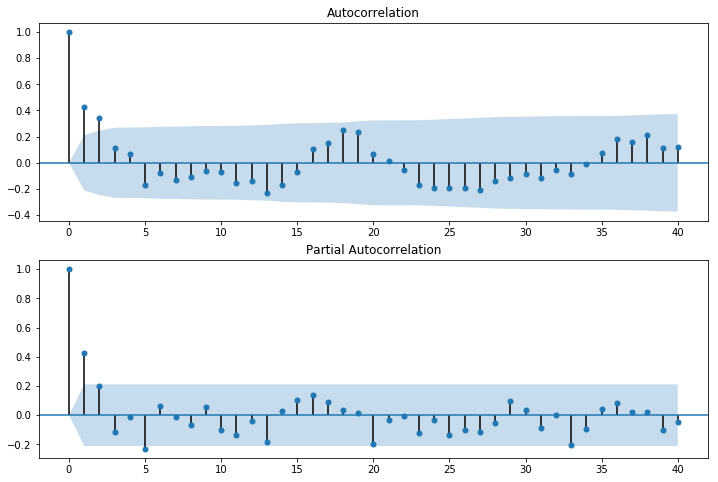

In [26]:
autocorrelation_check(y_ma[:86],alpha=0.05)

In [27]:
model_ma_4_months = sm.tsa.ARIMA(y_ma[:86],(0,0,2)).fit(trend="nc")

In [28]:
model_ma_4_months.params

array([ 0.34955912,  0.26604034])

In [29]:
model_ma_4_months.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   86
Model:                     ARMA(0, 2)   Log Likelihood                  69.275
Method:                       css-mle   S.D. of innovations              0.108
Date:                Thu, 15 Mar 2018   AIC                           -132.549
Time:                        18:28:08   BIC                           -125.186
Sample:                             0   HQIC                          -129.586
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ma.L1.y        0.3496      0.111      3.137      0.002         0.131     0.568
ma.L2.y        0.2660      0.085      3.128      0.002         0.099     0.433
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.6570           -1.8241j            1.9388           -0.3050
MA.2           -0.6570           +1.8241j            1.9388            0.3050
-----------------------------------------------------------------------------
"""

>Conclusion: When we decrease the observations, the MA order turns out to be smaller because of the increasing in variance of paramteter estimations (i.e. compare the attributes *std err* of coefficients). Still, true value lays in its confidence interval. But not that persuasive since the large variance.

## 3. ARMA Models

### Generate three year worth of daily data for an ARMA(4,4) model using the combination of parameters in parts (a) from the two problems above. Turn in the two graphs (ACF, PACF). What is the recommended order of the corresponding model based on the data and the graphs you plotted? Repeat parts (b), (c), and (d) of the above problems with this model.

In [30]:
ar

array([ 1.  ,  0.4 , -0.6 , -0.15,  0.1 ])

In [31]:
ma

array([ 1. ,  0.3,  0.4,  0.2,  0.1])

In [32]:
model = sm.tsa.ArmaProcess(ar=ar,ma=ma)

In [33]:
model.isstationary

True

In [34]:
model.isinvertible

True

In [35]:
y_arma = model.generate_sample(1008,scale=0.1)

### b)

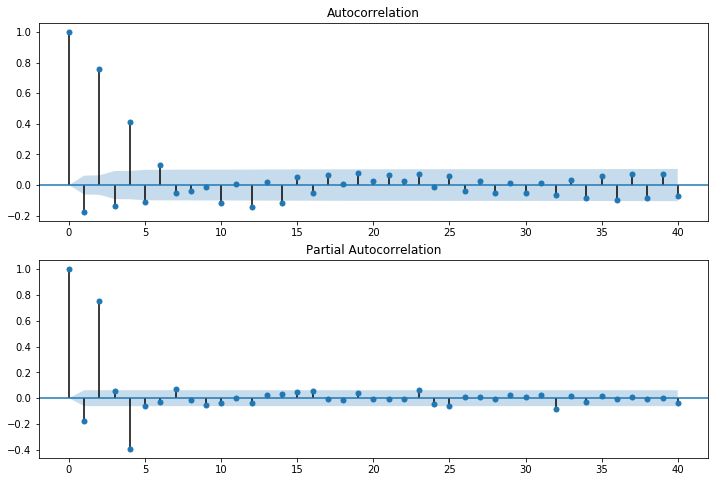

In [36]:
autocorrelation_check(y_arma,alpha=0.05)

>Conclusion: Using 5% significant level, based on ACF PACF graphs, we cannot concluded that p=4, q=6. The ACF and PACF are not informative in determining the order of an ARMA model. Should use EACF or information criterion to determine the model order.

### c) 4 years observations

In [51]:
def IdentifyOrderArma(y, pmax, qmax, method="bic"):
    a = np.zeros((pmax,qmax))
    if(method=="bic"):
        for i in range(6):
            for j in range(6):
                try:
                    a[i,j] = sm.tsa.ARMA(y_arma,(i+1,j+1)).fit(trend='nc',method='css-mle').bic
                except ValueError:
                    a[i,j] = np.nan
    elif(method=="aic"):
        for i in range(6):
            for j in range(6):
                try:
                    a[i,j] = sm.tsa.ARMA(y_arma,(i+1,j+1)).fit(trend='nc',method='css-mle').aic
                except ValueError:
                    a[i,j] = np.nan
    else:
        print("error method can only be bic or aic")
        return
    i,j = np.unravel_index(np.nanargmin(a), a.shape)
    p = i+1
    q = j+1
    return ((p,q),a)

In [53]:
(p,q),a = IdentifyOrderArma(y_arma,6,6,'bic')     

D:\Softwares\Anaconda3\envs\py36\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Softwares\Anaconda3\envs\py36\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Softwares\Anaconda3\envs\py36\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Softwares\Anaconda3\envs\py36\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Softwares\Anaconda3\envs\py36\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed

In [54]:
(p,q)

(4, 1)

In [55]:
a

array([[ -906.64836344,            nan,            nan, -1652.38051864,
        -1663.24933625, -1699.06588836],
       [-1552.3749238 , -1689.96551374, -1686.22070277, -1700.05508891,
        -1693.50912559, -1696.6786516 ],
       [-1603.67616928, -1692.14049136, -1687.3753953 , -1698.15617666,
        -1696.15441697, -1689.91585993],
       [-1713.28756199, -1706.48672659, -1705.67468947, -1698.75919968,
        -1693.17735066, -1686.37834276],
       [-1706.39578396, -1700.28694541, -1698.75907146, -1691.88173754,
        -1686.31702426, -1683.32174278],
       [-1704.90872236, -1704.90294854, -1698.38071441, -1691.56424779,
        -1679.12004002, -1680.37071466]])

>Based on BIC, we choose p=4, and q=1

In [56]:
fitted_model = sm.tsa.ARMA(y_arma,(4,1)).fit(trend='nc',method='css-mle')

In [57]:
fitted_model.params

array([ 0.05935429,  1.06661093, -0.06595409, -0.40145169, -0.14376154])

In [71]:
np.r_[arparams[:p],maparams[:q]]

array([-0.4 ,  0.6 ,  0.15, -0.1 ,  0.3 ])

>Conclusion: <span style="color:red"> **It's not satisfactory here!! And I don't know how to detect and diagnosis it!** </span> Maybe MA algorithm rather than MLE is more suitable for parameters estimation in Time-Series analysis

### d) 3 months observations

In [ ]:
autocorrelation_check(y_arma[:86],alpha=0.05)

In [63]:
(p,q),a = IdentifyOrderArma(y_arma[:86],6,6,'bic')

D:\Softwares\Anaconda3\envs\py36\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Softwares\Anaconda3\envs\py36\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Softwares\Anaconda3\envs\py36\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Softwares\Anaconda3\envs\py36\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Softwares\Anaconda3\envs\py36\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed

In [64]:
(p,q)

(4, 1)

>Based on BIC, we identify the order of the ARMA model as p=4, q=1

In [68]:
fitted_model= sm.tsa.ARMA(y_arma[:86],(4,1)).fit(trend='nc',method='css-mle')

In [70]:
fitted_model.params

array([-0.16526793,  1.01796842,  0.15274868, -0.35785296,  0.06873086])

In [72]:
np.r_[arparams[:p],maparams[:q]]

array([-0.4 ,  0.6 ,  0.15, -0.1 ,  0.3 ])

>Conclusion: <span style="color:red"> **It's not satisfactory here!! And I don't know how to detect and diagnosis it!** </span> Maybe MA algorithm rather than MLE is more suitable for parameters estimation in Time-Series analysis

><span style="color:red"> Why even the data from ARMA model itself fits bad?</span>

## 4. Stock Returns (10 Points) Download the past 4 years of daily prices of a stock of your choice. Compute the time series of continuously compounded returns (log returns) rt, and find the best ARMA model for rt. To help you determine the order you may use ACF, PACF, EACF, as well as any information criteria measures (e.g., AIC, BIC, etc.). You need to be able to explain what you are doing (and why).

In [73]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [74]:
import datetime
def preprocess_wrds_data(df):
    df['date'] = df['date'].apply(lambda x: datetime.datetime.strptime(str(x),"%Y%m%d"))
#     print(df.head())
    df.index = df.date
    df.drop(['date'],axis=1,inplace=True)
    df['simple_return'] = (df.PRC-df.PRC.shift(1))/df.PRC.shift(1)
    df['log_return'] = np.log(df.PRC/df.PRC.shift(1))
#     spdf = df.totval
#     print(spdf.head())

In [75]:
df_5y_d = pd.read_csv("NVDA_5yr_d.csv")
preprocess_wrds_data(df_5y_d)
print(df_5y_d.head())

            PERMNO      PRC      RETX    sprtrn  simple_return  log_return
date                                                                      
2013-01-02   86580  12.7200  0.037520  0.025403            NaN         NaN
2013-01-03   86580  12.7300  0.000786 -0.002086       0.000786    0.000786
2013-01-04   86580  13.1500  0.032993  0.004865       0.032993    0.032460
2013-01-07   86580  12.7700 -0.028897 -0.003123      -0.028897   -0.029323
2013-01-08   86580  12.4915 -0.021809 -0.003242      -0.021809   -0.022050


In [76]:
df_5y_d.log_return.dropna(axis=0,inplace=True)

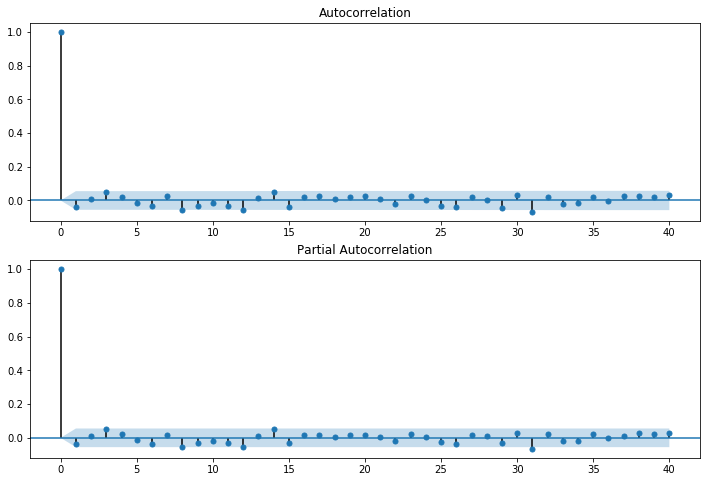

In [77]:
autocorrelation_check(df_5y_d.log_return,0.05)

In [78]:
(p,q),a = IdentifyOrderArma(df_5y_d.log_return,6,6,'bic')

D:\Softwares\Anaconda3\envs\py36\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Softwares\Anaconda3\envs\py36\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Softwares\Anaconda3\envs\py36\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Softwares\Anaconda3\envs\py36\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Softwares\Anaconda3\envs\py36\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed

In [79]:
(p,q)

(4, 1)

In [80]:
a

array([[ -906.64836344,            nan,            nan, -1652.38051864,
        -1663.24933625, -1699.06588836],
       [-1552.3749238 , -1689.96551374, -1686.22070277, -1700.05508891,
        -1693.50912559, -1696.6786516 ],
       [-1603.67616928, -1692.14049136, -1687.3753953 , -1698.15617666,
        -1696.15441697, -1689.91585993],
       [-1713.28756199, -1706.48672659, -1705.67468947, -1698.75919968,
        -1693.17735066, -1686.37834276],
       [-1706.39578396, -1700.28694541, -1698.75907146, -1691.88173754,
        -1686.31702426, -1683.32174278],
       [-1704.90872236, -1704.90294854, -1698.38071441, -1691.56424779,
        -1679.12004002, -1680.37071466]])

>Conclusion: Based on minimum BIC, p=4,q=1

In [81]:
model = sm.tsa.ARMA(df_5y_d.log_return,(4,1)).fit(trend='nc')

In [82]:
model.params

ar.L1.log_return   -0.070733
ar.L2.log_return    0.018167
ar.L3.log_return    0.063562
ar.L4.log_return    0.037017
ma.L1.log_return    0.041197
dtype: float64

In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             log_return   No. Observations:                 1258
Model:                     ARMA(4, 1)   Log Likelihood                3044.625
Method:                       css-mle   S.D. of innovations              0.022
Date:                Thu, 15 Mar 2018   AIC                          -6077.249
Time:                        18:54:41   BIC                          -6046.426
Sample:                    01-03-2013   HQIC                         -6065.665
                         - 12-29-2017                                         
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
ar.L1.log_return    -0.0707      0.484     -0.146      0.884        -1.019     0.877
ar.L2.log_return     0.0182      0.031      0.583      0.560        -0.043     0.079
ar.L3.log_return     0.0636      0.030      2.132      0.033         0.005     0.122
ar.L4.log_return     0.0370      0.041      0.913      0.362        -0.042     0.117
ma.L1.log_return     0.0412      0.484      0.085      0.932        -0.906     0.989
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9834           -0.0000j            1.9834           -0.0000
AR.2           -0.5121           -2.1970j            2.2559           -0.2864
AR.3           -0.5121           +2.1970j            2.2559            0.2864
AR.4           -2.6763           -0.0000j            2.6763           -0.5000
MA.1          -24.2734           +0.0000j           24.2734            0.5000
-----------------------------------------------------------------------------
"""

>Nevertheless, the std err are too large for our model parameters.

><span style="color:red">Question: How to handle it in financial data? Change model? What does the suitable std err look like?</span>